In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [18]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2) * 1/2

def mse_gradient(y_true, y_pred):
    return -1 * (y_true - y_pred)

def gradient_boosting(X, y, n_estimators=100, learning_rate=0.1, max_depth=10):
    n_samples = X.shape[0]

    y_pred = np.full(n_samples, y.mean())

    trees = []
    for i in range(n_estimators):
        residuals = -mse_gradient(y, y_pred)
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(X, residuals)
        predictions = tree.predict(X)
        y_pred += learning_rate * predictions
        trees.append(tree)

        loss = mse_loss(y, y_pred)
        if i % 10 ==0:
            print(f"Iteration {i}/{n_estimators}, Loss: {loss}")

    return trees, y.mean(), learning_rate

def predict(X, trees, base_prediction, learning_rate):
    y_pred = np.full(X.shape[0], base_prediction)
    for tree in trees:
        y_pred += learning_rate * tree.predict(X)
    return y_pred

Iteration 0/50, Loss: 5.938238337336073
Iteration 10/50, Loss: 2.357979801389269
Iteration 20/50, Loss: 1.8452526443973216
Iteration 30/50, Loss: 1.6969942314541548
Iteration 40/50, Loss: 1.5998384948264917
Final Loss: 1.5428219767796272


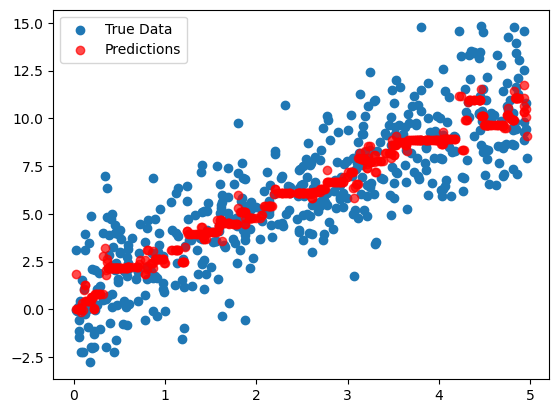

In [19]:
np.random.seed(42)
X = np.random.rand(500, 1) * 5
y = 2 * X.squeeze() + 1 + np.random.normal(0, 2, size=X.shape[0])

n_estimators = 50
learning_rate = 0.1
max_depth = 3

trees, base_prediction, lr = gradient_boosting(X, y, n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

y_pred = predict(X, trees, base_prediction, lr)

print("Final Loss:", mse_loss(y, y_pred))

plt.scatter(X, y, label="True Data")
plt.scatter(X, y_pred, label="Predictions", color="red", alpha=0.7)
plt.legend()
plt.show()